**RNNの実装**

In [ ]:
cd C:\Users\zawaz\Desktop\study_ai_ml_google\DNN_code_colab_lesson_3_4

In [2]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

In [3]:
def d_tanh(x):
    return 1/(np.cosh(x) ** 2)

In [16]:
# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 32
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
# W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
# W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
# W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)
# Xavier
# W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size))
# W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size))
# W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size))
# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)


# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
#         z[:,t+1] = functions.sigmoid(u[:,t+1])
        z[:,t+1] = functions.relu(u[:,t+1])
#         z[:,t+1] = np.tanh(u[:,t+1])    
        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_relu(u[:,t+1])
#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_tanh(u[:,t+1])    

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
#         print("iters:" + str(i))
#         print("Loss:" + str(all_loss))
#         print("Pred:" + str(out_bin))
#         print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
#         print("------------")

93 + 35 = 76
29 + 61 = 2
98 + 68 = 38
107 + 27 = 254
120 + 87 = 15
8 + 114 = 122
33 + 105 = 202
98 + 25 = 123
126 + 127 = 253
104 + 111 = 215
20 + 39 = 59
48 + 13 = 61
124 + 24 = 148
42 + 20 = 62
58 + 14 = 72
17 + 29 = 46
30 + 33 = 63
83 + 90 = 173
108 + 88 = 196
98 + 46 = 144
127 + 73 = 146
55 + 53 = 238
19 + 86 = 105
123 + 121 = 118
43 + 85 = 130
13 + 29 = 174
3 + 65 = 70
14 + 25 = 35
38 + 6 = 172
22 + 93 = 107
80 + 119 = 5
74 + 29 = 85
120 + 42 = 130
25 + 34 = 59
4 + 33 = 37
24 + 107 = 33
5 + 104 = 37
120 + 3 = 41
100 + 49 = 85
41 + 92 = 85
34 + 52 = 18
37 + 14 = 33
44 + 67 = 37
53 + 18 = 5
15 + 36 = 33
120 + 34 = 10
79 + 100 = 33
73 + 105 = 32
82 + 63 = 5
58 + 98 = 0
109 + 106 = 5
70 + 58 = 40
92 + 70 = 10
36 + 47 = 1
34 + 2 = 32
7 + 53 = 16
34 + 69 = 37
34 + 117 = 85
57 + 83 = 40
64 + 90 = 10
52 + 106 = 10
108 + 14 = 34
44 + 56 = 20
102 + 9 = 37
94 + 92 = 2
88 + 123 = 33
34 + 125 = 85
16 + 5 = 21
57 + 105 = 0
123 + 54 = 69
122 + 90 = 32
69 + 47 = 32
121 + 28 = 65
90 + 108 = 34
56 

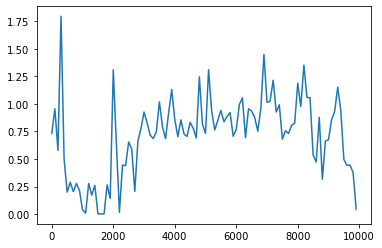

In [17]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

RNNの実装を体験した。中間層や重みの更新を変えてもあまり大きな影響はなかったが、学習率によってはうまく収束せず、ReLUを使っているときはその傾向が顕著であることを確認できた。